### 1. Data Visualization and Presentation for Agricultural Data Insights
#####  Eric Maniraguha | emanirag@andrew.cmu.edu | 2023

## 1. Loading rainfall dataset 

In [345]:
!pip install openpyxl --quiet

In [346]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore') 

In [347]:
# Loading rainfall dataset 
file_path = './rwa-rainfall-adm2-5ytd.csv'

# Loading the CSV rainfall dataset into a pandas DataFrame
rw_rainfall_data_df = pd.read_csv(file_path)

# Display the first five rows of the DataFrame
rw_rainfall_data_df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,2019-01-01,1011450,RW22,24.0,30.1667,34.1806,107.3333,115.85,479.375,394.2556,89.7554,93.2327,121.0559,final
2,2019-01-11,1011450,RW22,24.0,78.0,34.3222,130.875,115.2542,524.5,383.5944,211.0766,112.4713,135.7997,final
3,2019-01-21,1011450,RW22,24.0,48.9167,38.175,157.0833,106.6778,516.8333,375.1361,124.8794,143.2006,136.7915,final
4,2019-02-01,1011450,RW22,24.0,50.4167,34.8792,177.3333,107.3764,492.8333,357.7056,138.9614,159.6005,136.7489,final


1. Filtering my dataset by selecting rfh (Rainfall height (mm)) by date 

In [348]:
rw_rainfall_data_filtered = rw_rainfall_data_df[['date','rfh']].drop(0).reset_index().drop(columns=['index'])
rw_rainfall_data_filtered.head()

,date,rfh
0,2019-01-01,30.1667
1,2019-01-11,78.0
2,2019-01-21,48.9167
3,2019-02-01,50.4167
4,2019-02-11,14.875


In [349]:
# Transform my date column to datetime format
rw_rainfall_data_filtered['date'] = pd.to_datetime(rw_rainfall_data_filtered['date'])

2. Filtered DataFrame for the date range 2021 to 2023

In [350]:
# Filter data for the date range from 2021 to 2023
# Select the start date and end date
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')
rw_rainfall_data_filtered_2021_2023 = rw_rainfall_data_filtered[(rw_rainfall_data_filtered['date'] >= start_date) & (rw_rainfall_data_filtered['date'] <= end_date)]

rw_rainfall_data_filtered_2021_2023.reset_index().drop(columns=['index'])

,date,rfh
0,2021-01-01,24.5
1,2021-01-11,18.3333
2,2021-01-21,44.5417
3,2021-02-01,45.4583
4,2021-02-11,44.2083
...,...,...
3281,2023-10-21,25.5
3282,2023-11-01,34.0
3283,2023-11-11,34.5
3284,2023-11-21,47.5


In [351]:
# Create a new column for the month

rw_rainfall_data_filtered_2021_2023['month'] = rw_rainfall_data_filtered_2021_2023['date'].dt.month.copy()
rw_rainfall_data_filtered_2021_2023.reset_index().drop(columns='index')

,date,rfh,month
0,2021-01-01,24.5,1
1,2021-01-11,18.3333,1
2,2021-01-21,44.5417,1
3,2021-02-01,45.4583,2
4,2021-02-11,44.2083,2
...,...,...,...
3281,2023-10-21,25.5,10
3282,2023-11-01,34.0,11
3283,2023-11-11,34.5,11
3284,2023-11-21,47.5,11


In [352]:
# Filter data for the months of March to May
filtered_data_september_november = rw_rainfall_data_filtered_2021_2023[
    rw_rainfall_data_filtered_2021_2023['month'].between(3, 5)
]

# Display the filtered DataFrame - at least 10 first rows 
filtered_data_september_november.head(10)


,date,rfh,month
78,2021-03-01,61.7083,3
79,2021-03-11,36.8333,3
80,2021-03-21,34.7083,3
81,2021-04-01,42.625,4
82,2021-04-11,67.875,4
83,2021-04-21,47.0833,4
84,2021-05-01,95.1667,5
85,2021-05-11,109.4583,5
86,2021-05-21,14.3333,5
114,2022-03-01,32.5,3


In [353]:

# Filter data for the years 2021, 2022, and 2023 separately
filtered_data_2021 = filtered_data_september_november[
    filtered_data_september_november['date'].dt.year == 2021
]

filtered_data_2022 = filtered_data_september_november[
    filtered_data_september_november['date'].dt.year == 2022
]

filtered_data_2023 = filtered_data_september_november[
    filtered_data_september_november['date'].dt.year == 2023
]
filtered_data_rfh_2023_B = filtered_data_2023 ['rfh']
filtered_data_2023

,date,rfh,month
150,2023-03-01,24.3333,3
151,2023-03-11,83.2917,3
152,2023-03-21,62.625,3
153,2023-04-01,85.0833,4
154,2023-04-11,60.6667,4
...,...,...,...
5494,2023-04-11,53.0,4
5495,2023-04-21,53.0,4
5496,2023-05-01,60.0,5
5497,2023-05-11,10.0,5


In [354]:
# Concatenate DataFrames into a single DataFrame of year selected 
filtered_data_combined = pd.concat([filtered_data_2021, filtered_data_2022, filtered_data_2023])
filtered_data_combined=filtered_data_combined.reset_index()
filtered_data_combined=filtered_data_combined[filtered_data_combined.columns[1:]]
filtered_data_combined

,date,rfh,month
0,2021-03-01,61.7083,3
1,2021-03-11,36.8333,3
2,2021-03-21,34.7083,3
3,2021-04-01,42.625,4
4,2021-04-11,67.875,4
...,...,...,...
832,2023-04-11,53.0,4
833,2023-04-21,53.0,4
834,2023-05-01,60.0,5
835,2023-05-11,10.0,5


In [355]:
# Filter data for the date range from 2021 to 2023
start_date = pd.to_datetime('2021-03-01')
end_date = pd.to_datetime('2021-05-31')
rw_rainfall_data_filtered_2021 = filtered_data_combined[(filtered_data_combined['date'] >= start_date) & (filtered_data_combined['date'] <= end_date)]

rw_rainfall_data_filtered_2021 = rw_rainfall_data_filtered_2021.reset_index().drop(columns=['index'])

# Convert the rfh column to integer
rw_rainfall_data_filtered_2021['rfh'] = rw_rainfall_data_filtered_2021['rfh'].astype(float)

# Check dataset info
rw_rainfall_data_filtered_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    279 non-null    datetime64[ns]
 1   rfh     279 non-null    float64       
 2   month   279 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 5.6 KB


In [356]:
# Filter data for the date range from 2021 to 2023
start_date = pd.to_datetime('2022-03-01')
end_date = pd.to_datetime('2022-05-31')
rw_rainfall_data_filtered_2022 = filtered_data_combined[(filtered_data_combined['date'] >= start_date) & (filtered_data_combined['date'] <= end_date)]

rw_rainfall_data_filtered_2022 = rw_rainfall_data_filtered_2022.reset_index().drop(columns=['index'])


# Convert the rfh column to integer
rw_rainfall_data_filtered_2022['rfh'] = rw_rainfall_data_filtered_2022['rfh'].astype(float)
rw_rainfall_data_filtered_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    279 non-null    datetime64[ns]
 1   rfh     279 non-null    float64       
 2   month   279 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 5.6 KB


In [357]:
# Filter data for the date range from 2023 to 2023
start_date = pd.to_datetime('2023-03-01')
end_date = pd.to_datetime('2023-05-31')
rw_rainfall_data_filtered_2023 = filtered_data_combined[(filtered_data_combined['date'] >= start_date) & (filtered_data_combined['date'] <= end_date)]

rw_rainfall_data_filtered_2023 = rw_rainfall_data_filtered_2023.reset_index().drop(columns=['index'])

# Convert the rfh column to integer
rw_rainfall_data_filtered_2023['rfh'] = rw_rainfall_data_filtered_2023['rfh'].astype(float)
rw_rainfall_data_filtered_2023

,date,rfh,month
0,2023-03-01,24.3333,3
1,2023-03-11,83.2917,3
2,2023-03-21,62.6250,3
3,2023-04-01,85.0833,4
4,2023-04-11,60.6667,4
...,...,...,...
274,2023-04-11,53.0000,4
275,2023-04-21,53.0000,4
276,2023-05-01,60.0000,5
277,2023-05-11,10.0000,5


In [358]:
rw_rainfall_data_filtered_2023['rfh'].mean()

59.28067956989248

## 2. Loading final season dataset

In [359]:
# loading dataset of agriculture seasonal 
file_path = './2023 Season _Final Tables.xlsx'

# Loading the Excel file into a pandas DataFrame, and skip 3 rows 
rw_season_data_df = pd.read_excel(file_path, skiprows=3)

# Display the top 5 columns of my dataframe 
rw_season_data_df.head()


,Unnamed: 0,Crop/Groups,Cultivated Crop area (Ha),Unnamed: 3,Unnamed: 4,Unnamed: 5,Harvested Crop area (Ha),Unnamed: 7,Production (MT),Unnamed: 9,Unnamed: 10,Yield (MT/ha),Unnamed: 12,Unnamed: 13
0,NaN,NaN,2023 B,2022 B,2021 B,2023 B,2022 B,2021 B,2023 B,2022 B,2021 B,2023 B,2022 B,2021 B
1,NaN,Cereals,245131.808442,259847.924168,240314,243831.925604,259744.866211,240314,341152.926576,(NA),(NA),(NA),(NA),(NA)
2,NaN,Maize,93927.1495,81339.2103,80570,93815.781398,81282.348587,80570,117613.093185,109615.112305,104041,1.25366,1.348572,1.291
3,NaN,Sorghum,121078.896,139792.66905,133033,121053.557836,139792.087848,133033,139424.863803,147411.371798,134331,1.151762,1.054504,1.01
4,NaN,Paddy rice,16677.91483,16516.54606,16302,16603.305613,16474.241817,16302,69940.422105,68072.283583,67808,4.21244,4.132043,4.159


In [360]:
rw_season_data_df.columns

Index(['Unnamed: 0', 'Crop/Groups', 'Cultivated Crop area (Ha)', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Harvested Crop area (Ha)', 'Unnamed: 7',
       'Production (MT)', 'Unnamed: 9', 'Unnamed: 10', 'Yield (MT/ha)',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

##### 2.1 Select Columns, Renaming my columns 

In [361]:
rw_season_Harvested_area_and_prod = rw_season_data_df[['Crop/Groups','Unnamed: 5', 'Harvested Crop area (Ha)', 'Unnamed: 7','Production (MT)', 'Unnamed: 9', 'Unnamed: 10']]

rw_season_Harvested_area_and_prod =rw_season_Harvested_area_and_prod.rename(columns = {"Unnamed: 5":"Harvested_area (Ha)-2023 B", \
                                                                   "Harvested Crop area (Ha)":"Harvested Crop area (Ha)-2022 B",\
                                                                   "Unnamed: 7":"Harvested_area (Ha)-2021 B", \
                                                                   
                                                                  "Production (MT)":"Production (MT)-2023 B",\
                                                                  "Unnamed: 9":"Production (MT)-2022 B",\
                                                                  "Unnamed: 10":"Production (MT)-2021 B"})
rw_season_Harvested_area_and_prod=rw_season_Harvested_area_and_prod[1:]
rw_season_Harvested_area_and_prod=rw_season_Harvested_area_and_prod.reset_index()
rw_season_Harvested_area_and_prod=rw_season_Harvested_area_and_prod.drop('index', axis=1)
rw_season_Harvested_area_and_prod=rw_season_Harvested_area_and_prod[1:5]
rw_season_Harvested_area_and_prod


,Crop/Groups,Harvested_area (Ha)-2023 B,Harvested Crop area (Ha)-2022 B,Harvested_area (Ha)-2021 B,Production (MT)-2023 B,Production (MT)-2022 B,Production (MT)-2021 B
1,Maize,93815.781398,81282.348587,80570,117613.093185,109615.112305,104041
2,Sorghum,121053.557836,139792.087848,133033,139424.863803,147411.371798,134331
3,Paddy rice,16603.305613,16474.241817,16302,69940.422105,68072.283583,67808
4,Wheat,10375.071482,8481.613981,8749,13129.235405,9857.908783,9184


#### 2.2 Dataset Scaling 

In [362]:
list_rain_2023B, list_rain_2022B, list_rain_2021B = [], [], []

for i in range(len(rw_season_Harvested_area_and_prod["Crop/Groups"])):
    list_rain_2023B.append(rw_rainfall_data_filtered_2023['rfh'].mean())
    list_rain_2022B.append(rw_rainfall_data_filtered_2022['rfh'].mean())
    list_rain_2021B.append(rw_rainfall_data_filtered_2021['rfh'].mean())

In [363]:
rw_season_Harvested_area_and_prod["rain_2023B"]=list_rain_2023B
rw_season_Harvested_area_and_prod["rain_2022B"]=list_rain_2022B
rw_season_Harvested_area_and_prod["rain_2021B"]=list_rain_2021B 

rw_season_Harvested_area_and_prod

,Crop/Groups,Harvested_area (Ha)-2023 B,Harvested Crop area (Ha)-2022 B,Harvested_area (Ha)-2021 B,Production (MT)-2023 B,Production (MT)-2022 B,Production (MT)-2021 B,rain_2023B,rain_2022B,rain_2021B
1,Maize,93815.781398,81282.348587,80570,117613.093185,109615.112305,104041,59.28068,45.921422,47.341428
2,Sorghum,121053.557836,139792.087848,133033,139424.863803,147411.371798,134331,59.28068,45.921422,47.341428
3,Paddy rice,16603.305613,16474.241817,16302,69940.422105,68072.283583,67808,59.28068,45.921422,47.341428
4,Wheat,10375.071482,8481.613981,8749,13129.235405,9857.908783,9184,59.28068,45.921422,47.341428


In [364]:
x = np.arange(len(rw_season_Harvested_area_and_prod["Crop/Groups"]))

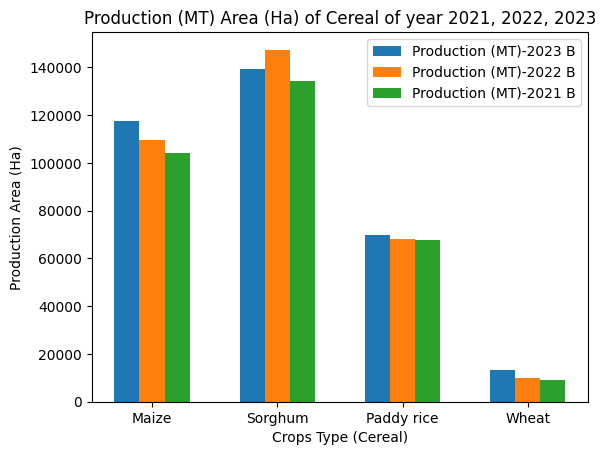

In [365]:
plt.title("Production (MT) Area (Ha) of Cereal of year 2021, 2022, 2023")
plt.bar(x-0.2, rw_season_Harvested_area_and_prod["Production (MT)-2023 B"],width=0.2, label ='Production (MT)-2023 B')
plt.bar(rw_season_Harvested_area_and_prod["Crop/Groups"], rw_season_Harvested_area_and_prod["Production (MT)-2022 B"],width=0.2, label ='Production (MT)-2022 B')
plt.bar(x+0.2, rw_season_Harvested_area_and_prod["Production (MT)-2021 B"],width=0.2, label ='Production (MT)-2021 B', )
plt.ylabel('Production Area (Ha)')
plt.xlabel('Crops Type (Cereal)')
plt.legend();

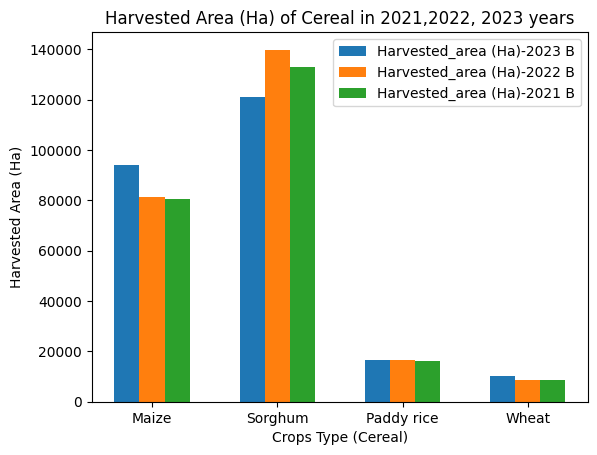

In [366]:
plt.title("Harvested Area (Ha) of Cereal in 2021,2022, 2023 years")
plt.bar(x-0.2, rw_season_Harvested_area_and_prod["Harvested_area (Ha)-2023 B"],width=0.2, label ='Harvested_area (Ha)-2023 B')
plt.bar(rw_season_Harvested_area_and_prod["Crop/Groups"], rw_season_Harvested_area_and_prod["Harvested Crop area (Ha)-2022 B"],width=0.2, label ='Harvested_area (Ha)-2022 B')
plt.bar(x+0.2, rw_season_Harvested_area_and_prod["Harvested_area (Ha)-2021 B"],width=0.2, label ='Harvested_area (Ha)-2021 B', )

plt.ylabel('Harvested Area (Ha)')
plt.xlabel('Crops Type (Cereal)')
plt.legend();




## 3. Gathering Production Area, Harvested Area and Rainfall of years 2021, 2022 and 2023

In [367]:
rw_season_Harvested_area_and_prod=rw_season_Harvested_area_and_prod.reset_index().drop(columns='index')
rw_season_Harvested_area_and_prod

,Crop/Groups,Harvested_area (Ha)-2023 B,Harvested Crop area (Ha)-2022 B,Harvested_area (Ha)-2021 B,Production (MT)-2023 B,Production (MT)-2022 B,Production (MT)-2021 B,rain_2023B,rain_2022B,rain_2021B
0,Maize,93815.781398,81282.348587,80570,117613.093185,109615.112305,104041,59.28068,45.921422,47.341428
1,Sorghum,121053.557836,139792.087848,133033,139424.863803,147411.371798,134331,59.28068,45.921422,47.341428
2,Paddy rice,16603.305613,16474.241817,16302,69940.422105,68072.283583,67808,59.28068,45.921422,47.341428
3,Wheat,10375.071482,8481.613981,8749,13129.235405,9857.908783,9184,59.28068,45.921422,47.341428


#### 3.1 Enhancing Dataset Performance: The Role of Data Scale-Up"

In [368]:
columns = ["Production (MT)-2023 B", "Production (MT)-2022 B", "Production (MT)-2021 B"]
i=0
idx = ["n1","n2","n3"]
scld_production_2023B, scld_production_2022B,scld_production_2021B=[],[],[]
for col in columns:
    df=(rw_season_Harvested_area_and_prod[col]/rw_season_Harvested_area_and_prod._get_value(0,"Production (MT)-2023 B"))*100
    print(df)
    rw_season_Harvested_area_and_prod[col+idx[i]]=df.values

0         100.0
1    118.545359
2     59.466527
3     11.163073
Name: Production (MT)-2023 B, dtype: object
0     93.199753
1    125.335851
2     57.878151
3      8.381642
Name: Production (MT)-2022 B, dtype: object
0     88.460389
1    114.214325
2     57.653445
3      7.808654
Name: Production (MT)-2021 B, dtype: object


In [369]:
rw_season_Harvested_area_and_prod

,Crop/Groups,Harvested_area (Ha)-2023 B,Harvested Crop area (Ha)-2022 B,Harvested_area (Ha)-2021 B,Production (MT)-2023 B,Production (MT)-2022 B,Production (MT)-2021 B,rain_2023B,rain_2022B,rain_2021B,Production (MT)-2023 Bn1,Production (MT)-2022 Bn1,Production (MT)-2021 Bn1
0,Maize,93815.781398,81282.348587,80570,117613.093185,109615.112305,104041,59.28068,45.921422,47.341428,100.0,93.199753,88.460389
1,Sorghum,121053.557836,139792.087848,133033,139424.863803,147411.371798,134331,59.28068,45.921422,47.341428,118.545359,125.335851,114.214325
2,Paddy rice,16603.305613,16474.241817,16302,69940.422105,68072.283583,67808,59.28068,45.921422,47.341428,59.466527,57.878151,57.653445
3,Wheat,10375.071482,8481.613981,8749,13129.235405,9857.908783,9184,59.28068,45.921422,47.341428,11.163073,8.381642,7.808654


In [370]:
x=rw_season_Harvested_area_and_prod.columns[-3:]
x

Index(['Production (MT)-2023 Bn1', 'Production (MT)-2022 Bn1',
       'Production (MT)-2021 Bn1'],
      dtype='object')

In [371]:
# Convert columns into float
columns_to_convert = [
    'Harvested_area (Ha)-2023 B',
    'Harvested Crop area (Ha)-2022 B',
    'Harvested_area (Ha)-2021 B',
    'Production (MT)-2023 B',
    'Production (MT)-2022 B',
    'Production (MT)-2021 B',
    'Production (MT)-2023 Bn1',
    'Production (MT)-2022 Bn1',
    'Production (MT)-2021 Bn1',
]

rw_season_Harvested_area_and_prod[columns_to_convert] = rw_season_Harvested_area_and_prod[columns_to_convert].astype(float)
# Check datatype of my columns 
rw_season_Harvested_area_and_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Crop/Groups                      4 non-null      object 
 1   Harvested_area (Ha)-2023 B       4 non-null      float64
 2   Harvested Crop area (Ha)-2022 B  4 non-null      float64
 3   Harvested_area (Ha)-2021 B       4 non-null      float64
 4   Production (MT)-2023 B           4 non-null      float64
 5   Production (MT)-2022 B           4 non-null      float64
 6   Production (MT)-2021 B           4 non-null      float64
 7   rain_2023B                       4 non-null      float64
 8   rain_2022B                       4 non-null      float64
 9   rain_2021B                       4 non-null      float64
 10  Production (MT)-2023 Bn1         4 non-null      float64
 11  Production (MT)-2022 Bn1         4 non-null      float64
 12  Production (MT)-2021 Bn1  

In [372]:
x=np.arange(len(rw_season_Harvested_area_and_prod["Crop/Groups"]))

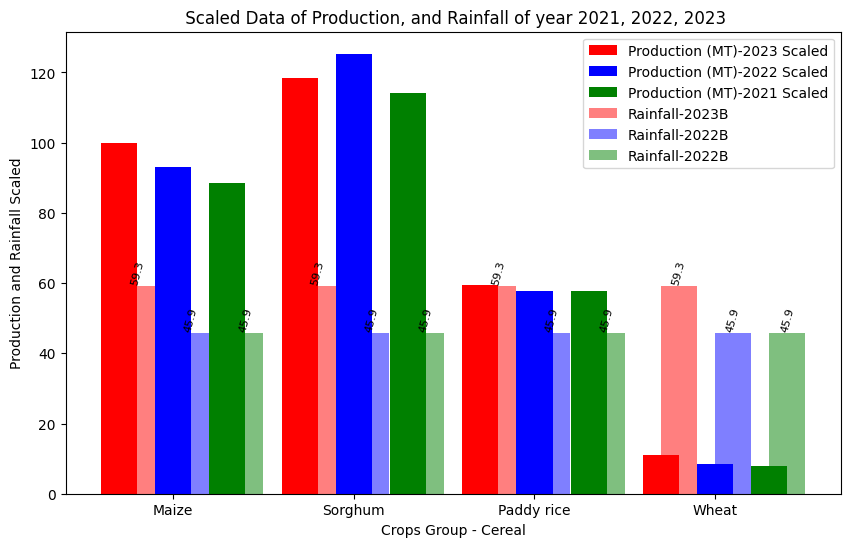

In [373]:
# Size of my diagram 
plt.figure(figsize=(10, 6))

# Get crop names and create an index for x-axis
crops = rw_season_Harvested_area_and_prod["Crop/Groups"]
x = list(range(len(crops)))  # Convert to list

# Plot the Production Area Bars
plt.bar(np.array(x) - 0.3, rw_season_Harvested_area_and_prod["Production (MT)-2023 Bn1"], \
        width=0.2, color='red', label='Production (MT)-2023 Scaled')
plt.bar(x, rw_season_Harvested_area_and_prod["Production (MT)-2022 Bn1"], \
        width=0.2, color='blue', label='Production (MT)-2022 Scaled')
plt.bar(np.array(x) + 0.3, rw_season_Harvested_area_and_prod["Production (MT)-2021 Bn1"], \
        width=0.2, color='green', label='Production (MT)-2021 Scaled')

# Plot the Rainfall Bars with transparency
plt.bar(np.array(x) - 0.2, rw_season_Harvested_area_and_prod["rain_2023B"], \
        width=0.2, color='red', alpha=0.5, label='Rainfall-2023B')
plt.bar(np.array(x) + 0.097, rw_season_Harvested_area_and_prod["rain_2022B"], \
        width=0.2, color='blue', alpha=0.5, label='Rainfall-2022B')
plt.bar(np.array(x) + 0.4, rw_season_Harvested_area_and_prod["rain_2022B"], \
        width=0.2, color='green', alpha=0.5, label='Rainfall-2022B')

# Add labels to the rainfall bars, rounded to one decimal 
for i, value in enumerate(rw_season_Harvested_area_and_prod["rain_2023B"]):
    plt.text(np.array(x)[i] - 0.2, value, f'{round(value, 1)}', ha='center', va='bottom', rotation=75, fontdict={'fontsize': 8})

for i, value in enumerate(rw_season_Harvested_area_and_prod["rain_2022B"]):
    plt.text(np.array(x)[i] + 0.097, value, f'{round(value, 1)}', ha='center', va='bottom', rotation=75, fontdict={'fontsize': 8})

for i, value in enumerate(rw_season_Harvested_area_and_prod["rain_2022B"]):
    plt.text(np.array(x)[i] + 0.4, value, f'{round(value, 1)}', ha='center', va='bottom', rotation=75, fontdict={'fontsize': 8})


plt.ylabel('Production and Rainfall Scaled')
plt.xlabel('Crops Group - Cereal')
plt.title(" Scaled Data of Production, and Rainfall of year 2021, 2022, 2023")
plt.xticks(x, crops)  # Set the crop names as x-axis labels
plt.legend()

plt.show()
